# Checking the difference in the prediction, number of times one experiment over and under predicts

## imports

In [15]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [16]:
from src.RQ1_forecast import *

In [17]:
num_samples = 100

In [18]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/traffic_nips/1A'

# metric section

In [19]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

101it [00:00, 35243.32it/s]
100%|###########| 100/100 [00:02<00:00, 49.66it/s]


In [20]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,0.000008,0.044827,0.388134,0.016172,0.008013,0.233096,0.139647,0.141910,NaN,3.208878,0.020943,0.000000,0.044827,0.208333,0.028707,0.750000
1,1,1.0,0.000090,0.161243,2.024384,0.084349,0.015693,0.428128,0.085533,0.084212,NaN,3.924869,0.101342,0.083333,0.161243,0.458333,0.072750,0.916667
2,2,2.0,0.000028,0.101510,0.939867,0.039161,0.015918,0.265704,0.118081,0.128882,NaN,1.651410,0.049539,0.000000,0.101510,0.041667,0.028299,0.833333
3,3,3.0,0.000018,0.083118,0.828968,0.034540,0.009018,0.384018,0.115051,0.117882,NaN,2.411599,0.040325,0.000000,0.083118,0.250000,0.028443,0.875000
4,4,4.0,0.000017,0.079716,1.114798,0.046450,0.010359,0.320638,0.075856,0.076958,NaN,1.784480,0.040253,0.000000,0.079716,0.500000,0.037226,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6736,6736,6736.0,0.000008,0.055825,1.009365,0.042057,0.008996,0.258573,0.074709,0.072106,NaN,1.296526,0.035653,0.000000,0.055825,0.333333,0.020330,1.000000
6737,6737,6737.0,0.000087,0.112175,1.366182,0.056924,0.016859,0.277230,0.130911,0.118056,NaN,1.272580,0.049365,0.000000,0.112175,0.833333,0.053618,1.000000
6738,6738,6738.0,0.000016,0.069200,0.961967,0.040082,0.014924,0.193203,0.117095,0.106899,NaN,1.068983,0.034464,0.041667,0.069200,0.416667,0.028366,0.958333
6739,6739,6739.0,0.000038,0.098722,1.390401,0.057933,0.015173,0.271096,0.095515,0.094902,NaN,1.579267,0.056786,0.000000,0.098722,0.458333,0.036423,0.875000


In [13]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [14]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [9]:
sort_metric_list(metrics_list1)


In [10]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,2019.402669,598.436890,1791.799927,74.658330,24.025698,1.037842,0.158530,1.229193,NaN,5.842292,235.832631,0.041667,598.436865,0.541667,168.698005,0.833333
1,137,0.0,718.545736,374.505371,1627.949951,67.831248,24.022371,0.649577,0.222699,1.221874,NaN,6.697982,174.627846,0.041667,374.505363,0.750000,166.678793,0.958333
2,274,0.0,2040.664388,615.164368,1352.599976,56.358332,24.036565,1.066369,0.276495,1.263949,NaN,12.423396,339.329610,0.083333,615.164389,0.708333,228.145595,0.958333
3,411,0.0,2422.986003,725.752747,2323.600098,96.816671,24.053575,1.257181,0.142497,1.247661,NaN,19.616685,269.244695,0.000000,725.752731,0.333333,483.660755,0.666667
4,548,0.0,785.221191,388.657074,2260.250000,94.177083,24.050071,0.673347,0.079196,1.169308,NaN,3.687271,220.902641,0.000000,388.657069,0.500000,90.049041,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,410,136.0,2233.754883,619.357178,612.900024,25.537501,16.200384,1.592959,1.680391,1.472916,NaN,31.654167,540.422320,0.291667,619.357189,0.958333,198.180612,1.000000
955,547,136.0,2559.966797,675.722656,1532.449951,63.852081,16.184125,1.739675,0.165331,1.296938,NaN,37.967382,221.738759,0.000000,675.722631,0.416667,635.723807,0.666667
956,684,136.0,989.931315,410.138916,1489.300049,62.054169,16.193131,1.055332,0.120356,1.224054,NaN,10.126644,178.353107,0.000000,410.138924,0.541667,148.241510,0.750000
957,821,136.0,3088.449219,736.751953,475.000000,19.791667,16.202090,1.894694,5.208185,1.532594,NaN,34.813347,569.461008,0.375000,736.751913,0.791667,248.590265,1.000000


# Forecast section

In [21]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
# forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

101it [00:00, 31388.91it/s]
100%|###########| 100/100 [05:05<00:00,  3.06s/it]


In [22]:
len(forcast_list1)

100

In [24]:
forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
0,1,0,2008-06-15 17:00:00,0.028350,0.024031,0.028417,0.027856,0.025824,0.025447,0.022454,...,0.021542,0.026103,0.025176,0.021612,0.030469,0.018757,0.029491,0.026713,0.014287,0.028270
1,1,0,2008-06-15 18:00:00,0.019783,0.012870,0.022937,0.019817,0.017738,0.020516,0.018255,...,0.013682,0.022882,0.021164,0.013668,0.016662,0.015784,0.022616,0.017735,0.014778,0.022391
2,1,0,2008-06-15 19:00:00,0.017150,0.011041,0.017988,0.016234,0.014714,0.018186,0.016799,...,0.012153,0.019930,0.015415,0.013520,0.014002,0.011281,0.016752,0.015277,0.008677,0.017937
3,1,0,2008-06-15 20:00:00,0.014717,0.011780,0.014052,0.013422,0.013129,0.015640,0.014720,...,0.012747,0.016426,0.013574,0.011627,0.012218,0.010105,0.015873,0.013373,0.009570,0.014587
4,1,0,2008-06-15 21:00:00,0.012967,0.008963,0.012803,0.012013,0.012030,0.013374,0.012494,...,0.011660,0.015016,0.012201,0.010869,0.011398,0.010146,0.013471,0.011205,0.008184,0.014282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161779,1,6740,2008-06-22 12:00:00,0.081800,0.077928,0.079233,0.078984,0.071641,0.088470,0.080774,...,0.067377,0.082520,0.075312,0.073471,0.080201,0.074788,0.071766,0.069899,0.076113,0.081469
161780,1,6740,2008-06-22 13:00:00,0.080983,0.077688,0.081614,0.085797,0.077982,0.083030,0.068984,...,0.067407,0.076679,0.079739,0.078838,0.078546,0.068606,0.069904,0.077776,0.083652,0.075799
161781,1,6740,2008-06-22 14:00:00,0.087267,0.092541,0.094277,0.099611,0.096184,0.099040,0.089823,...,0.077976,0.087878,0.121247,0.084844,0.110264,0.089065,0.137166,0.094733,0.107132,0.090899
161782,1,6740,2008-06-22 15:00:00,0.120983,0.113647,0.124498,0.134951,0.129827,0.127471,0.126682,...,0.112118,0.124094,0.133519,0.142600,0.140137,0.126031,0.139140,0.142853,0.134867,0.126686


In [25]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=963)
# sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [26]:
sorted_forcast_list1[0].head(169)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2008-06-15 17:00:00,0.028350,0.024031,0.028417,0.027856,0.025824,0.025447,0.022454,...,0.030469,0.018757,0.029491,0.026713,0.014287,0.028270,0,0.024383,0.009758,0.102604
1,1,0,2008-06-15 18:00:00,0.019783,0.012870,0.022937,0.019817,0.017738,0.020516,0.018255,...,0.016662,0.015784,0.022616,0.017735,0.014778,0.022391,0,0.019985,0.007850,0.096798
2,1,0,2008-06-15 19:00:00,0.017150,0.011041,0.017988,0.016234,0.014714,0.018186,0.016799,...,0.014002,0.011281,0.016752,0.015277,0.008677,0.017937,0,0.016744,0.004424,0.111817
3,1,0,2008-06-15 20:00:00,0.014717,0.011780,0.014052,0.013422,0.013129,0.015640,0.014720,...,0.012218,0.010105,0.015873,0.013373,0.009570,0.014587,0,0.013999,0.002985,0.098602
4,1,0,2008-06-15 21:00:00,0.012967,0.008963,0.012803,0.012013,0.012030,0.013374,0.012494,...,0.011398,0.010146,0.013471,0.011205,0.008184,0.014282,0,0.012623,0.002166,0.112713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,5778,2008-06-22 13:00:00,0.026083,0.022219,0.024342,0.024565,0.030626,0.021574,0.018023,...,0.027704,0.023084,0.025469,0.024017,0.023229,0.019918,0,0.023459,0.003022,0.145186
165,1,5778,2008-06-22 14:00:00,0.028083,0.022736,0.022272,0.024899,0.022159,0.021813,0.020112,...,0.027222,0.055205,0.025348,0.024417,0.021872,0.019954,0,0.024084,0.003955,0.108192
166,1,5778,2008-06-22 15:00:00,0.023383,0.022329,0.024907,0.026117,0.021427,0.023219,0.020955,...,0.030368,0.042997,0.027158,0.025745,0.024984,0.022759,0,0.025177,0.003123,0.112933
167,1,5778,2008-06-22 16:00:00,0.025383,0.030533,0.024278,0.026302,0.021538,0.025562,0.022301,...,0.028582,0.041764,0.026380,0.027464,0.020625,0.024810,0,0.025926,0.003886,0.161377


In [27]:
target_forcast_series = get_forcast_target(forcast_list1)

In [28]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

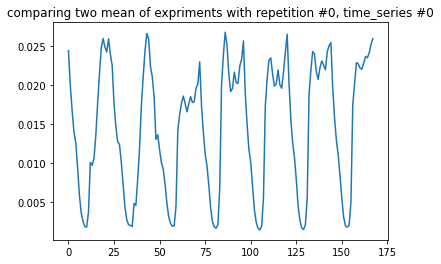

In [29]:
# plot mean of only one time series
rep_no = 0
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
# ts_list2[rep_no]['mean'].plot()

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [35]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[34]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[93]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[4]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[96]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# # experiment B
# expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [36]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')




percentage of underprediction of worst repetition for experiment A = 0.5860406467883104
percentage of underprediction of best repetition for experiment A = 0.67311971517579
percentage of underprediction of highest repetition for experiment A = 0.10551105177273401
percentage of underprediction of lowest repetition for experiment A = 0.931186025812194


In [30]:
# find the one with the highest prediction
get_highest_prediction_id(sorted_forcast_list1, high_flag=False), get_highest_prediction_id(sorted_forcast_list1, high_flag=True)

(96, 4)

In [31]:
# find max difference between each experiments with itself and also combined
# combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
# combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
# expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [37]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
# print(f'the most different tuples of experiment B is: {expB_max_tuple}')
# print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (4, 96)


(10500.0, 10650.0)

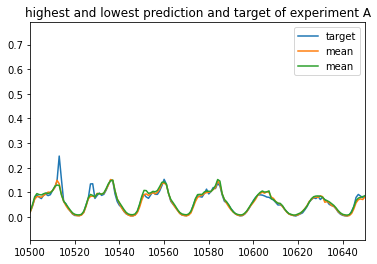

In [38]:
plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[36]['mean'].plot(legend=True)
sorted_forcast_list1[42]['mean'].plot(legend=True)
plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

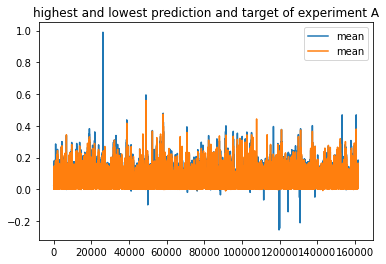

In [41]:
plt.title('highest and lowest prediction and target of experiment A')
# sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[4]['mean'].plot(legend=True)
sorted_forcast_list1[93]['mean'].plot(legend=True)
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

In [ ]:
# calculating the most appeared pairs
import statistics 
from statistics import mode 

mode(lower_pair_list), mode(higher_pair_list)

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

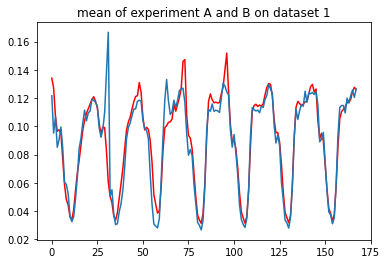

In [44]:
ts_no = 1

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
# means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
# for idx, ts_df2 in enumerate(ts_list2):
#     means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
# mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='r')
# plt.plot(mean_means_B, color='red')
plt.plot(ts_list1[0]['target'].to_numpy())
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape